In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('data/europe.csv')
countries = df.values[:, 0]
countries


array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom'], dtype=object)

In [3]:
scaled_data = np.zeros((len(df.values), len(df.values[0]) - 1))
for i in range(1, len(df.values[0])):
    aux = StandardScaler().fit_transform(df.values[:, i].reshape(-1, 1))
    scaled_data[:, i - 1] = aux[:, 0]
pca = PCA(n_components=7)
transform = pca.fit_transform(scaled_data)
components = pca.components_.T
correlation = np.corrcoef(scaled_data.T)

In [4]:
output_file = open('components.csv', 'w')

head = 'Features'
for i in range(7):
    head += f',PC{i}'
head += "\n"
output_file.write(head)

for i in range(len(components)):
    line = df.columns.values[i + 1]
    for j in components[i]:
        line += f',{j}'
    line += "\n"
    output_file.write(line)
output_file.close()

          Country    Area    GDP  Inflation  Life.expect  Military  \
0         Austria   83871  41600        3.5        79.91      0.80   
1         Belgium   30528  37800        3.5        79.65      1.30   
2        Bulgaria  110879  13800        4.2        73.84      2.60   
3         Croatia   56594  18000        2.3        75.99      2.39   
4  Czech Republic   78867  27100        1.9        77.38      1.15   

   Pop.growth  Unemployment  
0        0.03           4.2  
1        0.06           7.2  
2       -0.80           9.6  
3       -0.09          17.7  
4       -0.13           8.5  
                Area           GDP  Inflation  Life.expect   Military  \
count      28.000000     28.000000  28.000000    28.000000  28.000000   
mean   166422.535714  31860.714286   3.342857    78.122500   1.606071   
std    165538.675951  14502.115792   1.398260     3.189156   0.801352   
min      2586.000000   7200.000000   0.200000    68.740000   0.000000   
25%     48083.250000  20350.000000

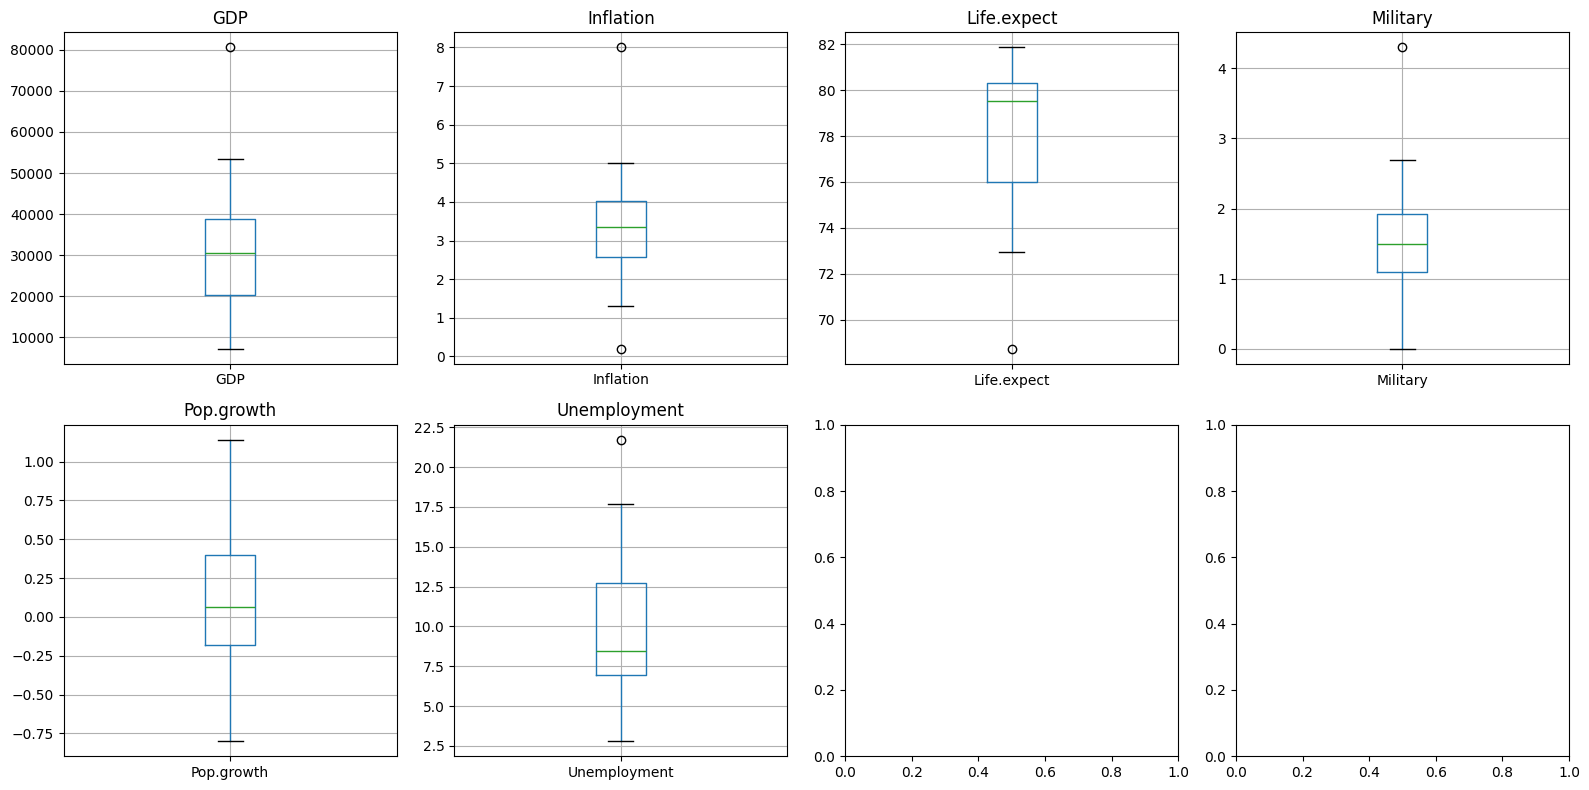

In [6]:
print(df.head())
print(df.describe())

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, col in enumerate(df.columns[2:]):
    ax = axes[i//4, i%4]
    df.boxplot(col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

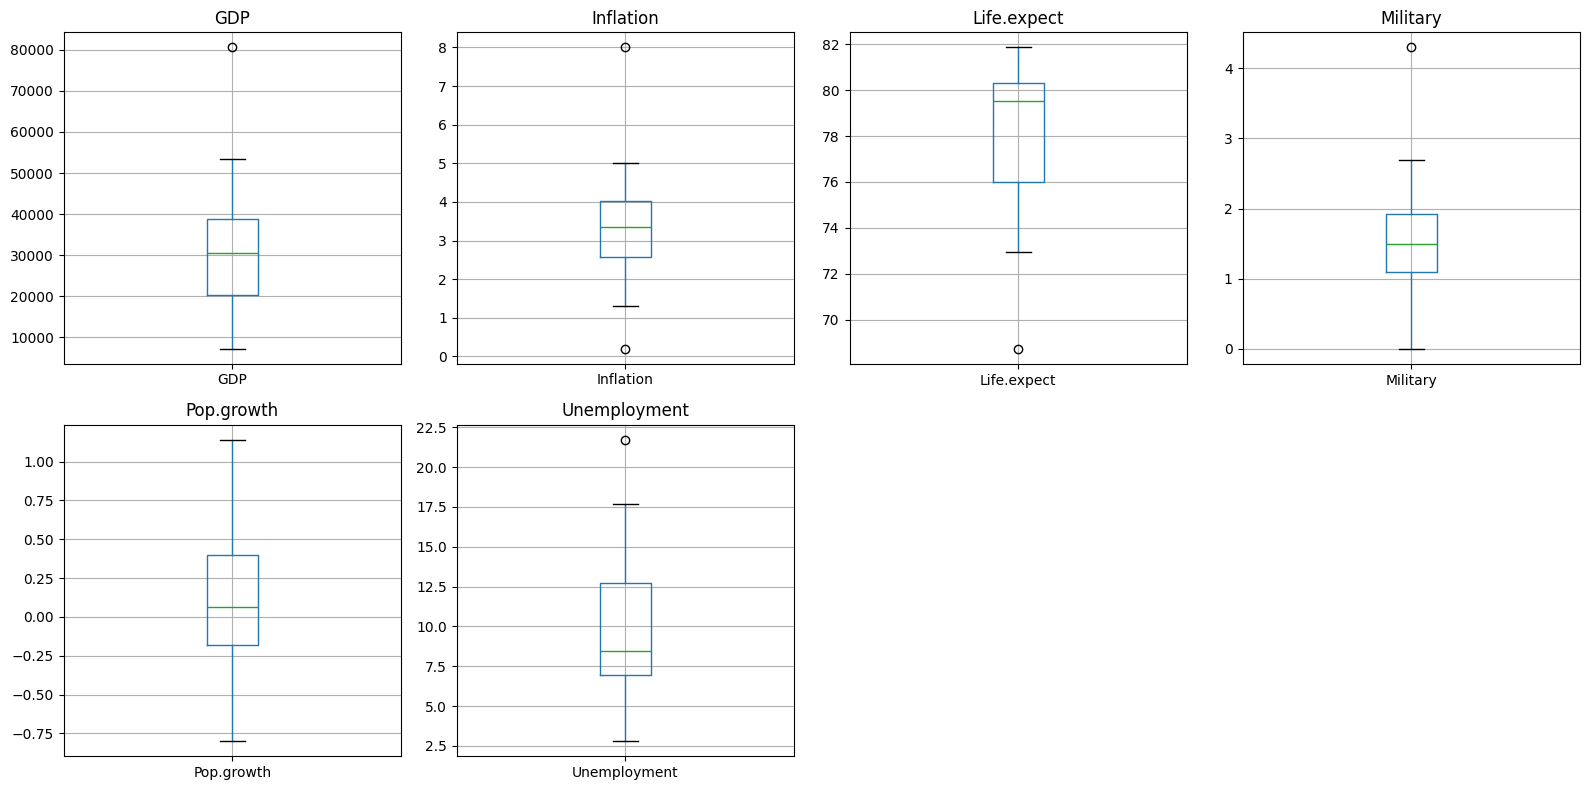

In [7]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(df.columns[2:]):
    plt.subplot(2, 4, i+1)  
    df.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()

Varianza explicada por cada componente: [0.53204088 0.19713494 0.12853008 0.08828418 0.03271719 0.02129273]


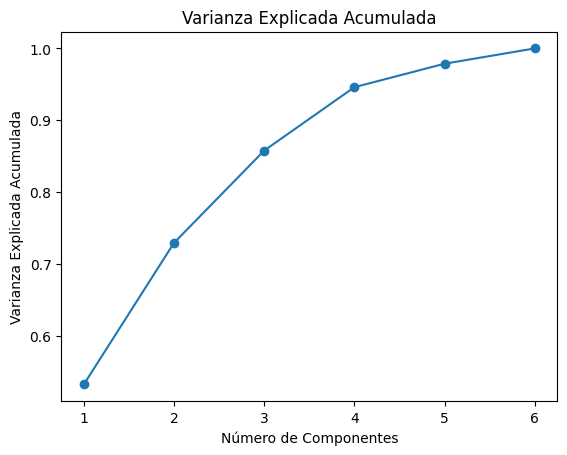

In [8]:
X = df.iloc[:, 2:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el PCA
pca = PCA(n_components=6) 
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, 7), cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada')
plt.show()


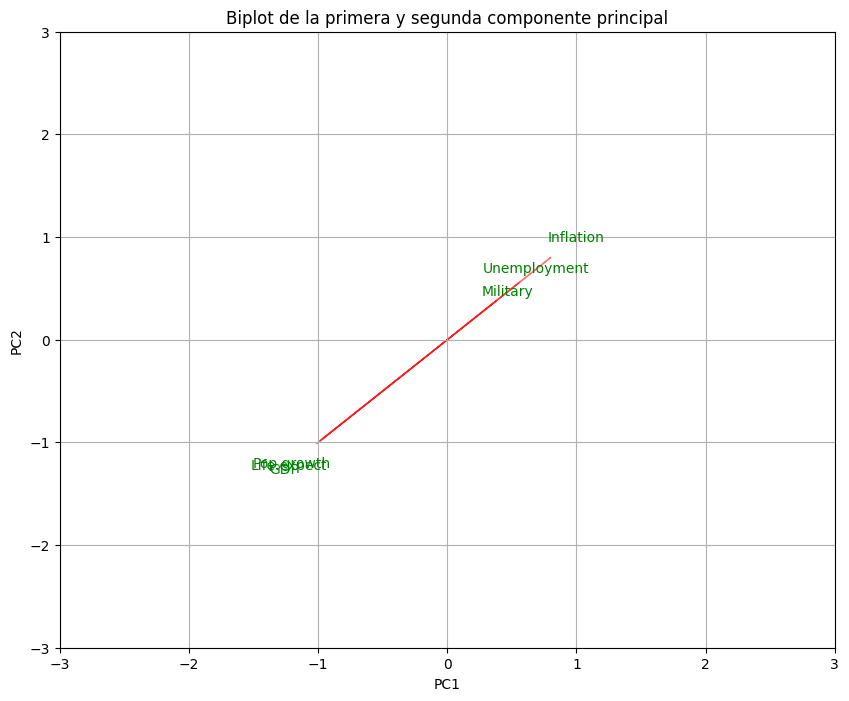

In [9]:
loadings = pca.components_[0, :]

plt.figure(figsize=(10, 8))

for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i]*2, loadings[i]*2, color='r', alpha=0.5)
    plt.text(loadings[i]*2.5, loadings[i]*2.5, var, color='g', ha='center', va='center', fontsize=10)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot de la primera y segunda componente principal')
plt.grid()
plt.show()
